# Analysis of Bike Sharing Data Set 

Prior to building any predictive models on our Bike Sharing data set lets first inspect, analyse and visualize the data set

In [5]:
import pandas as pd
import matplotlib.pyplot as pl
import datetime
import os
import numpy as np
import pylab as P
%matplotlib inline
os.getcwd()

'C:\\Users\\marcus.ohanlon'

In [6]:
df = pd.read_csv("Bike.csv")
df.dtypes

Date of Sale (dd/mm/yyyy)     object
Address                       object
Postal Code                   object
County                        object
Price                        float64
Not Full Market Price         object
VAT Exclusive                 object
Description of Property       object
Property Size Description     object
dtype: object

###Read in data and format dates

In [27]:
df = pd.read_csv("Bike.csv")

df["datetime"] = pd.to_datetime(df["datetime"])
df['Year'] = df['datetime'].map(lambda x: x.year)


df['Year'] = df['datetime'].map(lambda x: x.year)
df['Week'] = df['datetime'].map(lambda x: x.week)
df['Hour'] = df['datetime'].map(lambda x: x.hour)
df['day'] = df['datetime'].map(lambda x: x.weekday())
df['time'] = df['datetime'].map(lambda x: x.time())
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
Year                   int64
Week                   int64
Hour                   int64
day                    int64
time                  object
dtype: object

In [6]:
df.dtypes # check all data types	23	2	23:00:00
df.shape #check size of data set
df.count() #check for missing values

datetime      10886
season        10886
holiday       10886
workingday    10886
weather       10886
temp          10886
atemp         10886
humidity      10886
windspeed     10886
casual        10886
registered    10886
count         10886
Year          10886
Week          10886
Hour          10886
day           10886
time          10886
dtype: int64

In [7]:
df['time'].describe()

count        10886
unique          24
top       17:00:00
freq           456
dtype: object

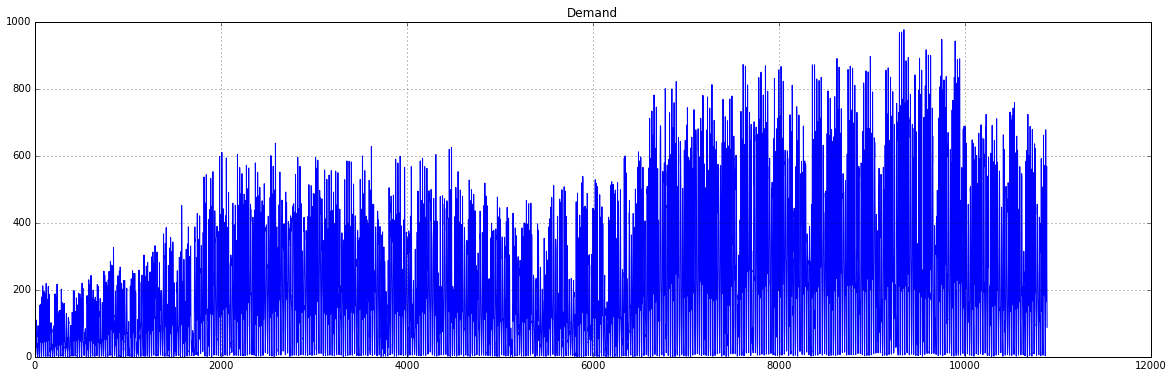

In [8]:
df['count'].plot(title='Demand', figsize=(20,6))

###Plot Day-Hour Versus Demand

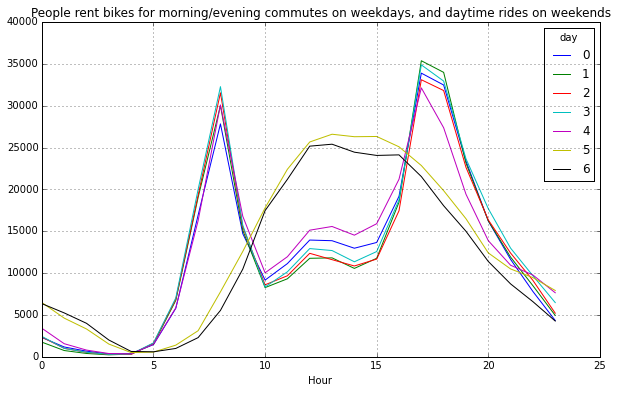

In [9]:
day_hour_events = df[['day','Hour','count']].groupby(['Hour','day']).sum().reset_index()
t = day_hour_events.pivot(index='Hour', columns='day', values='count').fillna(method='ffill')
t.interpolate().plot(title='People rent bikes for morning/evening commutes on weekdays, and daytime rides on weekends', figsize=(10,6))

###Plot Temp v Demand

In [10]:
df.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
dtype: float64

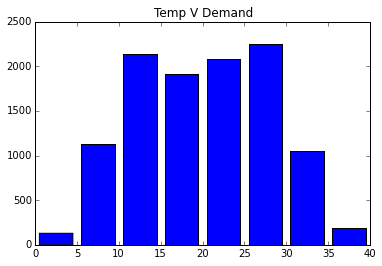

In [11]:
bins = [0,5,10,15,20,25,30,35,40]
P.hist(df.temp, bins, histtype='bar', rwidth=0.8)
P.title('Temp V Demand')

###Plot Hour V Temp V Demand

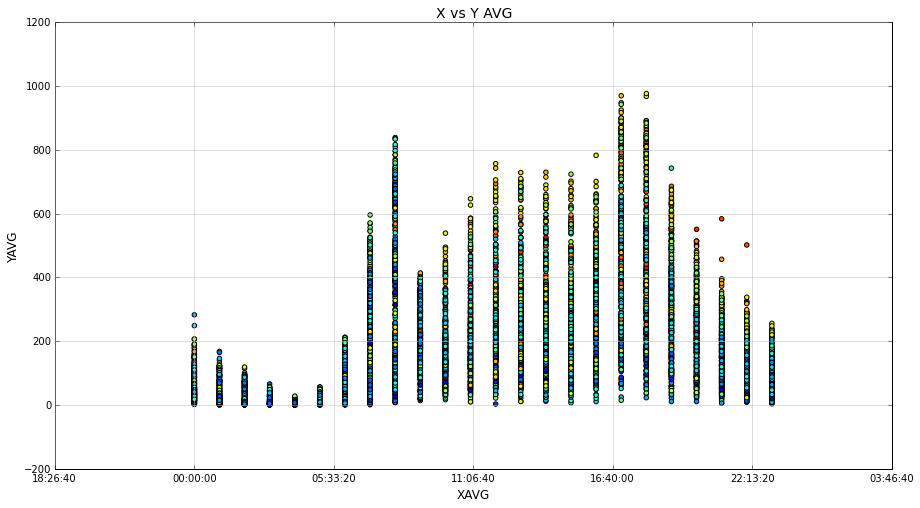

In [12]:

fig = P.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.set_title("X vs Y AVG",fontsize=14)
ax.set_xlabel("XAVG",fontsize=12)
ax.set_ylabel("YAVG",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')
ax.scatter(df['time'].values,df['count'],c=df['temp'])


# Build Some Models

Now lets build some models to try and predict the deamnd at a bike station based on the a number of variables

Firstly I split my data into test and train.

I wll also remove datetime as the data is now captured in Year, Week, Hour and day


In [32]:
df1= df.drop(['datetime','casual','registered','time'], axis = 1)
df_train_target = df1['count'].values
df_train_data = df1.drop(['count'],axis = 1).values
#print 'df_train_data shape is ', df_train_data.shape
#print 'df_train_target shape is ', df_train_target.shape
df1.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Year,Week,Hour,day
0,1,0,0,1,9.84,14.395,81,0,16,2011,52,0,5
1,1,0,0,1,9.02,13.635,80,0,40,2011,52,1,5
2,1,0,0,1,9.02,13.635,80,0,32,2011,52,2,5
3,1,0,0,1,9.84,14.395,75,0,13,2011,52,3,5
4,1,0,0,1,9.84,14.395,75,0,1,2011,52,4,5


In [16]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
#from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import explained_variance_score

#http://nbviewer.ipython.org/github/gig1/Python_Kaggle_Byke_Sharing_Demand/blob/master/Bicycle%20Tutorial.ipynb

In [35]:
cv = cross_validation.ShuffleSplit(len(df_train_data), n_iter=3, test_size=0.2,
    random_state=0)

print "SVR(kernel='rbf',C=10,gamma=.001)"
for train, test in cv:
    
    svc = svm.SVR(kernel ='rbf', C = 10, gamma = .001).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))

print "Ridge"    
for train, test in cv:    
    svc = linear_model.Ridge().fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))
    
print "Random Forest(n_estimators = 100)"    
for train, test in cv:    
    svc = RandomForestRegressor(n_estimators = 100).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))

SVR(kernel='rbf',C=10,gamma=.001)
train score: 0.421, test score: 0.410

train score: 0.409, test score: 0.454

train score: 0.423, test score: 0.393

Ridge
train score: 0.386, test score: 0.392

train score: 0.380, test score: 0.418

train score: 0.392, test score: 0.371

Random Forest(n_estimators = 100)
train score: 0.993, test score: 0.945

train score: 0.993, test score: 0.953

train score: 0.993, test score: 0.949



Wow Random Forest Regressor gives me the best result among the three models with a score of 94%. However, there is still room to improve. 